# RESULTS HERE ARE USING "ACCELERATE-D NUMPY" for faster CPU operations on MacOS with M2 Max Macbook Pro

In [1]:
nvoters = 100 # Change number of voters depending on test

In [2]:
numpy_type="Accelerate"

# Timing tests

This notebook runs all the classifiers with the easy-on-the-eyes dataset, and returns the runtimes for profiling.

## Instructions
1. Run the test with 1 voter
2. Change to desired number of voters and re-run the test. 
3. After 1 and 2, enable and run the last cell to save results.

## Import libraries

In [3]:
# Default libraries
import os
import re
import mne
import platform
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing
# import pycuda.driver as cuda
import scipy.signal as signal
import matplotlib.pyplot as plt
# from cupyx.profiler import benchmark


# Import custom libraries
from functions import data_tools
from functions import processing
from functions import classification
from functions.FeatureExtractorSSVEP import FeatureExtractorCCA as CCA
from functions.FeatureExtractorSSVEP import FeatureExtractorMSI as MSI
from functions.FeatureExtractorSSVEP import FeatureExtractorMEC as MEC

# Magic command to reload libraries
%reload_ext autoreload
# %autoreload 3

## CPU and GPU information

Get CPU and GPU information to save in results

In [4]:
# Get the number of processor types
short_name_processors = {
    "AMD64 Family 25 Model 33 Stepping 0, AuthenticAMD": "AMD Ryzen 7 5800X",
    "AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD": "AMD Ryzen 7 5800HS",
    "NVIDIA GeForce RTX 3050 Laptop GPU": "NVIDIA GeForce RTX 3050"
    }

# Get CPU and GPU information
# cpu_model = platform.processor()
cpu_model = "Apple Silicon M2 Max CPU 8 core 3.5 Ghz and 4 core 2.4 Ghz"

# cuda.init()
gpu_model = "Same as CPU – No GPU actually run"

# Replace CPU and GPU names if they are in the dictionary
cpu_model = short_name_processors.get(cpu_model, cpu_model)
gpu_model = short_name_processors.get(gpu_model, gpu_model)

In [5]:
cpu_model

'Apple Silicon M2 Max CPU 8 core 3.5 Ghz and 4 core 2.4 Ghz'

## Settings

In [6]:
# Change data folder depending on the computer used

# For Anup MacOS
data_folder = r"/Users/satori/Documents/Work/BCI4Kids/Projects/20241100--SSVEP_Toolbox/easy-on-the-eyes"
data_files = [r"sub-P004/ses-S001/eeg/sub-P004_ses-S001_task-T1_run-001_eeg.xdf"]

# data_folder = r"C:\Users\danie\OneDrive - University of Calgary\PDF\Proyects\Datasets\easy-on-the-eyes"
# data_files = [r"sub-P004\ses-S001\eeg\sub-P004_ses-S001_task-T1_run-001_eeg.xdf"]
# data_files = [r"sub-P015\ses-S001\eeg\sub-P015_ses-S001_task-T1_run-001_eeg.xdf"]
# data_files = [
#     r"sub-P003\ses-S001\eeg\sub-P003_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P004\ses-S001\eeg\sub-P004_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P005\ses-S001\eeg\sub-P005_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P006\ses-S001\eeg\sub-P006_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P007\ses-S001\eeg\sub-P007_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P008\ses-S001\eeg\sub-P008_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P009\ses-S001\eeg\sub-P009_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P010\ses-S001\eeg\sub-P010_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P011\ses-S001\eeg\sub-P011_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P012\ses-S001\eeg\sub-P012_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P015\ses-S001\eeg\sub-P015_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P016\ses-S001\eeg\sub-P016_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P019\ses-S001\eeg\sub-P019_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P020\ses-S001\eeg\sub-P020_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P021\ses-S001\eeg\sub-P021_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P022\ses-S001\eeg\sub-P022_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P023\ses-S001\eeg\sub-P023_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P024\ses-S001\eeg\sub-P024_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P025\ses-S001\eeg\sub-P025_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P026\ses-S001\eeg\sub-P026_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P027\ses-S001\eeg\sub-P027_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P028\ses-S001\eeg\sub-P028_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P029\ses-S001\eeg\sub-P029_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P030\ses-S001\eeg\sub-P030_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P031\ses-S001\eeg\sub-P031_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P033\ses-S001\eeg\sub-P033_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P034\ses-S001\eeg\sub-P034_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P035\ses-S001\eeg\sub-P035_ses-S001_task-T1_run-001_eeg.xdf",
#     r"sub-P036\ses-S001\eeg\sub-P036_ses-S001_task-T1_run-001_eeg.xdf",
#     ]
files = [os.path.join(data_folder, file) for file in data_files]

# Import and epoch data
eeg_channels = ["C3", "Cz", "C4", "T7", "T8", "P3", "Pz", "P4", "P7", "PO7", "POz", "P8", "PO8", "O1", "Oz", "O2"]
# eeg_channels = ["O1","Oz","O2"]
# stimulus_types = ['MaxContrast', 'WoodGrain', 'Worms', 'Voronoi', 'MinContrast', 'Checkerboard', 'Static'] # Complete list of stimulus types
stimulus_types = ["MaxContrast", "Checkerboard", "MinContrast"]
dict_of_stimuli = {0:" MaxContrast", 1:" Checkerboard", 2:" MinContrast"}
stimulus_freqs = {0:"9.090909", 1:"14.28571", 2:"33.33333"}
list_of_freqs = [float(freq) for freq in stimulus_freqs.values()]
event_labels = np.array([0,0,0,1,1,1,2,2,2])

# Preprocessing settings
fc_low = 0.1    # Cut frequency for the high-pass filter [Hz]
fc_high = 100   # Cut frequency for the low-pass filter [Hz]
order = 4       # Order of the Butterworth filter

# Results
results = pd.DataFrame(
    columns=[
        "Classifier",
        "Processor_type",
        "Processor_model",        
        "Voters_number",
        "Mean",
        "SD",                
        "All_runs"
        ])

## Classifier settings

In [7]:
# Classifier settings
nharmonics = 2
first_column = np.arange(1, 40, 3)
second_column = np.full(first_column.shape, 40)
cca_filterbank = np.column_stack((first_column, second_column))
filter_order = 12
batch_size = 256
ncores = multiprocessing.cpu_count()

## Preprocesss data

Import, epoch, and preprocess data in CPU before starting

In [8]:
# Preallocate variables
classifier_data = [None] * len(files)

for (f,file) in enumerate(files):
    subject_number = re.findall(r'sub-P(\d+)', file)[0]

    # Import data and markers
    [eeg_time, eeg, srate] = data_tools.read_xdf(file)
    [marker_time, markers] = data_tools.read_xdf_unity_markers(file)

    # Bandpass filter the EEG
    eeg_filtered = processing.bandpass_filter(
        eeg = eeg,
        srate = srate,
        f_low = fc_low,
        f_high = fc_high,
        f_order = order
        )

    # Filter 60 Hz noise
    eeg = processing.line_filter(eeg=eeg, srate=srate, f_notch=60, f_order=4)

    # Epoch data
    [eeg_epochs, epoch_labels] = data_tools.epochs_from_unity_markers(
        eeg_time = eeg_time,
        eeg_data = eeg_filtered,
        marker_time = marker_time,
        marker_data = markers
        )

    # Get stimuli and frequencies labels
    fixed_labels = data_tools.fix_labels(epoch_labels)          # Fix labels that might be incorrect in pilot trials
    # dict_of_stimuli = data_tools.get_tvep_stimuli(fixed_labels) # Dictionary of unique stimulus
    dict_of_stimuli = {0: " MaxContrast", 1: " Checkerboard", 2: " MinContrast"}
    # - Create array of eeg epochs organized as [stimuli, freq, chans, samples]
    eeg_epochs_organized = data_tools.epochs_stim_freq(
        eeg_epochs = eeg_epochs,
        labels = fixed_labels,
        stimuli = dict_of_stimuli,
        freqs = stimulus_freqs,
        mode = "zeropad"
        )
    
    # Convert data to float32 to speed up computations
    # and reshape data to have all epochs in the same dimension
    classifier_data[f] = np.float32(eeg_epochs_organized.reshape(
        len(dict_of_stimuli) * len(event_labels),
        len(eeg_channels),
        eeg_epochs_organized.shape[-1],
        ))


## Timing profiler - CPU

### CCA

In [9]:
def time_cca_cpu():
    for trial in classifier_data:
        cca_cpu = CCA()

        cca_cpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            targets_frequencies = list_of_freqs,
            filter_order = filter_order,
            subbands = cca_filterbank,
            sampling_frequency = srate,
            use_gpu = False,
            samples_count = trial.shape[-1],
            explicit_multithreading = ncores,
            max_batch_size = batch_size,
            voters_count = nvoters
            )
        
        cca_cpu.extract_features(trial)

In [10]:
cca_cpu_results = %timeit -n 1 -r 5 -o \
time_cca_cpu()

10.7 s ± 617 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [11]:
new_row = pd.DataFrame({
    "Classifier": "fbCCA",
    "Processor_type": "CPU",
    "Processor_model": cpu_model,
    "Voters_number": nvoters,
    "Mean": cca_cpu_results.average,
    "SD": cca_cpu_results.stdev,
    "All_runs": [np.array(cca_cpu_results.all_runs)]
    })

results = pd.concat([results, new_row], ignore_index=True)

### MEC

In [12]:
def time_mec_cpu():
    for trial in classifier_data:
        mec_cpu = MEC()

        mec_cpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            targets_frequencies = list_of_freqs,
            sampling_frequency = srate,
            use_gpu = False,
            samples_count = trial.shape[-1],
            explicit_multithreading = ncores,
            max_batch_size = batch_size,
            voters_count = nvoters
            )
            
        mec_cpu.extract_features(trial)

In [13]:
mec_cpu_results = %timeit -n 1 -r 5 -o \
time_mec_cpu()

56.6 s ± 229 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [14]:
new_row = pd.DataFrame({
    "Classifier": "MEC",
    "Processor_type": "CPU",
    "Processor_model": cpu_model,
    "Voters_number": nvoters,
    "Mean": mec_cpu_results.average,
    "SD": mec_cpu_results.stdev,
    "All_runs": [np.array(mec_cpu_results.all_runs)]
    })

results = pd.concat([results, new_row], ignore_index=True)

### MSI

In [15]:
def time_msi_cpu():
    for trial in classifier_data:
        msi_cpu = MSI()

        msi_cpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            targets_frequencies = list_of_freqs,
            sampling_frequency = srate,
            use_gpu = False,
            samples_count = trial.shape[-1],
            explicit_multithreading = ncores,
            max_batch_size = batch_size,
            voters_count = nvoters
            )
            
        msi_cpu.extract_features(trial)

In [16]:
msi_cpu_results = %timeit -n 1 -r 5 -o \
time_msi_cpu()

842 ms ± 8.82 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [17]:
new_row = pd.DataFrame({
    "Classifier": "MSI",
    "Processor_type": "CPU",
    "Processor_model": cpu_model,
    "Voters_number": nvoters,
    "Mean": msi_cpu_results.average,
    "SD": msi_cpu_results.stdev,
    "All_runs": [np.array(msi_cpu_results.all_runs)]
    })

results = pd.concat([results, new_row], ignore_index=True)

del msi_cpu_results

## Timing profiler GPU

### CCA

def time_cca_gpu():
    for trial in classifier_data:
        cca_gpu = CCA()

        cca_gpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            subbands = cca_filterbank,
            filter_order = filter_order,
            targets_frequencies = list_of_freqs,
            sampling_frequency = srate,
            # use_gpu = True,
            use_gpu = False,
            samples_count = trial.shape[-1],
            max_batch_size = batch_size,
            voters_count = nvoters
            )
        
        cca_gpu.extract_features(trial)

cca_gpu_results = benchmark(
    time_cca_gpu,
    n_repeat = 5,
    n_warmup = 5,
    devices = (0,)
    )

new_row = pd.DataFrame({
    "Classifier": "fbCCA",
    "Processor_type": "GPU",
    "Processor_model": gpu_model,
    "Voters_number": nvoters,
    "Mean": np.mean(cca_gpu_results.gpu_times),
    "SD": np.std(cca_gpu_results.gpu_times),
    "All_runs": [np.array(cca_gpu_results.gpu_times)]
    })

results = pd.concat([results, new_row], ignore_index=True)

### MEC

def time_mec_gpu():
    for trial in classifier_data:
        mec_gpu = MEC()

        mec_gpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            targets_frequencies = list_of_freqs,
            sampling_frequency = srate,
            # use_gpu = True,
            use_gpu = False,
            samples_count = trial.shape[-1],
            max_batch_size = batch_size,
            voters_count = nvoters
            )
        
        mec_gpu.extract_features(trial)

mec_gpu_results = benchmark(
    time_mec_gpu,
    n_repeat = 5,
    n_warmup = 5,
    devices = (0,)
    )

new_row = pd.DataFrame({
    "Classifier": "MEC",
    "Processor_type": "GPU",
    "Processor_model": gpu_model,
    "Voters_number": nvoters,
    "Mean": np.mean(mec_gpu_results.gpu_times),
    "SD": np.std(mec_gpu_results.gpu_times),
    "All_runs": [np.array(mec_gpu_results.gpu_times)]
    })

results = pd.concat([results, new_row], ignore_index=True)

### MSI

def time_msi_gpu():
    for trial in classifier_data:
        msi_gpu = MSI()

        msi_gpu.setup_feature_extractor(
            harmonics_count = nharmonics,
            targets_frequencies = list_of_freqs,
            sampling_frequency = srate,
            # use_gpu = True,
            use_gpu = False,
            samples_count = trial.shape[-1],
            max_batch_size = batch_size,
            voters_count = nvoters
            )
        
        msi_gpu.extract_features(trial)

msi_gpu_results = benchmark(
    time_msi_gpu,
    n_repeat = 5,
    n_warmup = 5,
    devices = (0,)
    )

new_row = pd.DataFrame({
    "Classifier": "MSI",
    "Processor_type": "GPU",
    "Processor_model": gpu_model,
    "Voters_number": nvoters,
    "Mean": np.mean(msi_gpu_results.gpu_times),
    "SD": np.std(msi_gpu_results.gpu_times),
    "All_runs": [np.array(msi_gpu_results.gpu_times)]
    })

results = pd.concat([results, new_row], ignore_index=True)

## Plot results

Run this sections for a simple plot of the timing results. For a more detailed plot, use the [timing_plots](timing_plots.ipynb) notebook.

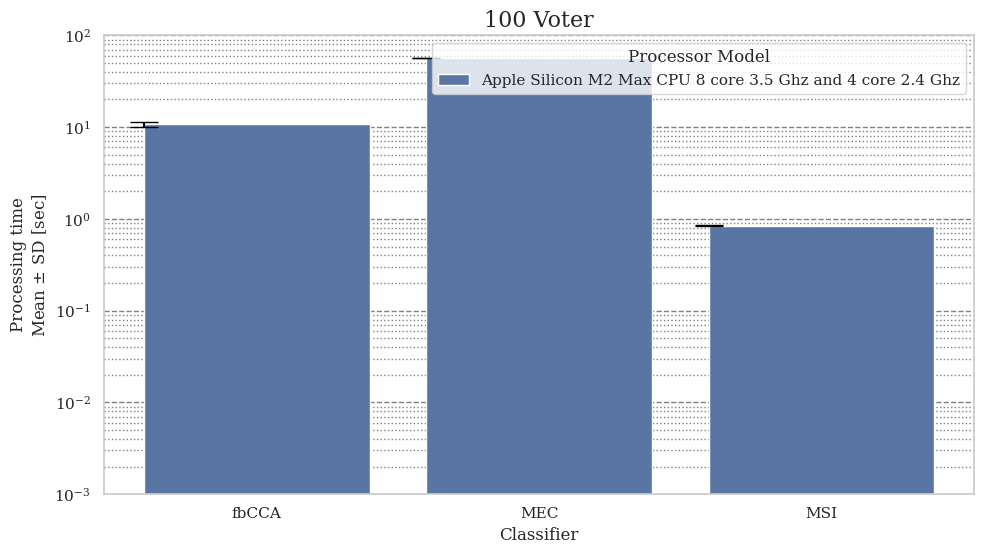

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the combined results
sns.barplot(
    data=results,
    x='Classifier',
    y='Mean',
    hue='Processor_type',
    ax=ax,
    capsize=0.1,
    alpha=1,
    zorder=2,
    palette='deep'  # Use the default matplotlib color scheme
)

# Add error bars
for i, classifier in enumerate(results['Classifier'].unique()):
    for j, processor_type in enumerate(results['Processor_type'].unique()):
        mean = results[(results['Classifier'] == classifier) & (results['Processor_type'] == processor_type)]['Mean']
        sd = results[(results['Classifier'] == classifier) & (results['Processor_type'] == processor_type)]['SD']
        x_pos = i + (j - 0.5) * 0.8 / len(results['Processor_type'].unique())  # Adjust x position for error bars
        ax.errorbar(x=x_pos, y=mean, yerr=sd, fmt='none', capsize=10, color='black', zorder=3)

# Set the gridlines to be black and behind the barplots
ax.grid(axis='y', linestyle='--', alpha=0.5, color='black', zorder=0)
ax.yaxis.grid(True, which='minor', linestyle=':', alpha=0.5, color='black', zorder=0)

# Set the y-axis scale to logarithmic
ax.set_yscale('log')
ax.set_ylim(1e-3, 1e2)

# Set the title and labels
ax.set_ylabel('Processing time\nMean $\pm$ SD [sec]')

# Add legend
handles, labels = ax.get_legend_handles_labels()
labels = [cpu_model if label == 'CPU' else gpu_model for label in labels]
ax.legend(handles, labels, title='Processor Model')

# Set the main title
ax.set_title(f'{nvoters} Voter', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Save results

In [21]:
save_results = True

if save_results:
    results.to_csv(f"results-Timing_tests-M2Max_CPU-NumPy_{numpy_type}-Voters{nvoters}.csv")


`np.show_config()` will show that the `blas.name` is `blas` and `openblas_configuration` is unknown for "Accelerate" NumPy

In [22]:
np.show_config()

Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /Users/satori/Applications/miniforge3/envs/ssvep-npaccel_moabb/include
    lib directory: /Users/satori/Applications/miniforge3/envs/ssvep-npaccel_moabb/lib
    name: blas
    openblas configuration: unknown
    pc file directory: /Users/satori/Applications/miniforge3/envs/ssvep-npaccel_moabb/lib/pkgconfig
    version: 3.9.0
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep4351753808
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.4
Compilers:
  c:
    args: -ftree-vectorize, -fPIC, -fstack-protector-strong, -O2, -pipe, -isystem,
      /Users/satori/Applications/miniforge3/envs/ssvep-npaccel_moabb/include, -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/numpy_1707225416355/work=/usr/local/src/conda/numpy-1.26.4,
      -fdebug-prefix-map=/Users/satori/Applications/minif